In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import triu

## Dataset Creation

In [60]:
# import songs
tracks = pd.DataFrame(columns = ['filename', 'artist_name', 'song_name'])

In [61]:
# paste Kaggle link
songs_df = pd.read_csv('data/tracks.csv')
songs_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [62]:
# remove matching artists and name
# drop duplicates with same name and artist
# keep the last duplicate, values with both same name and artist get removed
songs_df = songs_df.drop_duplicates(
  subset = ['name', 'artists'],
  keep = 'last').reset_index(drop = True)
songs_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526605,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
526606,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
526607,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
526608,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [63]:
songs_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526610 entries, 0 to 526609
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                526610 non-null  object 
 1   name              526609 non-null  object 
 2   popularity        526610 non-null  int64  
 3   duration_ms       526610 non-null  int64  
 4   explicit          526610 non-null  int64  
 5   artists           526610 non-null  object 
 6   id_artists        526610 non-null  object 
 7   release_date      526610 non-null  object 
 8   danceability      526610 non-null  float64
 9   energy            526610 non-null  float64
 10  key               526610 non-null  int64  
 11  loudness          526610 non-null  float64
 12  mode              526610 non-null  int64  
 13  speechiness       526610 non-null  float64
 14  acousticness      526610 non-null  float64
 15  instrumentalness  526610 non-null  float64
 16  liveness          52

In [64]:
songs_df.isna().sum()

id                  0
name                1
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [65]:
# Drop na columns
songs_df.dropna(inplace=True)

In [66]:
songs_df.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [67]:
# Load artists dataset
artists_df = pd.read_csv('data/artists.csv')
artists_df

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,['black comedy'],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,['black comedy'],Donnell Rawlings,15


In [68]:
artists_df.isna().sum()

id             0
followers     11
genres         0
name           3
popularity     0
dtype: int64

Here, I realized that I had to convert the values into strings

In [69]:
import ast
def normalize_artist_ids(id_string):
    """
    Parse the string representation of a list and return the list of IDs.
    If the string is not a list, wrap the string in a list and return it.
    Parameters:
    - id_string: str - The string representation of the list
    """
    try:
        # Attempt to parse the string as a literal (list)
        id_list = ast.literal_eval(id_string)
        if isinstance(id_list, list):
            return id_list  # Return the list if it's already a list
        else:
            return [id_list]  # Wrap non-list data into a list
    except:
        # Handle cases where the string is not a list but a single ID
        return [id_string]  # Wrap the single ID into a list

# Normalize artist IDs
songs_df['id_artists'] = songs_df['id_artists'].apply(normalize_artist_ids)
songs_df['artists'] = songs_df['artists'].apply(normalize_artist_ids)



In [70]:

songs_df['artist_with_id'] = songs_df.apply(lambda x: list(zip(x['artists'], x['id_artists'])), axis=1)

# exploding the track if there are multiple artists allows me to see the impact of each artist
songs_df = songs_df.explode('artist_with_id')

# Split the tuples into separate columns
songs_df[['artist', 'artist_id']] = pd.DataFrame(songs_df['artist_with_id'].tolist(), index=songs_df.index)


In [71]:
songs_df.drop(columns=['artists', 'id_artists', 'artist_with_id'], inplace=True)

In [72]:
# songs_df.rename(columns={'artists': 'artist'}, inplace=True)
songs_df

,id,name,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist,artist_id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,Uli,45tIt06XoI0Iio4LBEVpls
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526606,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z
526607,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,FINNEAS,37M5pPGs6V1fchFJSgCguX
526608,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,Gentle Bones,4jGPdu95icCKVF31CcFKbS
526608,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,Clara Benin,5ebPSE9YI5aLeZ1Z2gkqjn


Combine the artist and track information

In [73]:
# combine the artist and track information
combined_df = pd.merge(songs_df, artists_df, left_on='artist_id', right_on='id', how='left')

In [74]:
combined_df

,id_x,name_x,popularity_x,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,valence,tempo,time_signature,artist,artist_id,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,...,0.1270,104.851,3,Uli,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,...,0.6550,102.009,1,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,...,0.4570,130.418,5,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,...,0.3970,169.980,3,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,...,0.1960,103.220,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,2020-10-21,0.765,0.6630,0,-5.223,...,0.6860,150.091,4,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z,1dy5WNgIKQU6ezkpZs4y8z,245944.0,"['alt z', 'alternative r&b', 'bedroom pop', 'i...",ROLE MODEL,67.0
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,2020-09-02,0.535,0.3140,7,-12.823,...,0.0663,145.095,4,FINNEAS,37M5pPGs6V1fchFJSgCguX,37M5pPGs6V1fchFJSgCguX,1168213.0,"['alt z', 'electropop', 'indie pop', 'la indie...",FINNEAS,77.0
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.4380,90.029,4,Gentle Bones,4jGPdu95icCKVF31CcFKbS,4jGPdu95icCKVF31CcFKbS,45309.0,"['chill r&b', 'indie cafe pop', 'singaporean p...",Gentle Bones,58.0
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.4380,90.029,4,Clara Benin,5ebPSE9YI5aLeZ1Z2gkqjn,5ebPSE9YI5aLeZ1Z2gkqjn,93797.0,"['opm', 'pinoy indie', 'pinoy singer-songwriter']",Clara Benin,53.0


In [75]:
# Remove and rename redundant columns after the join
combined_df.drop(columns=['id_y', 'name_y'], inplace=True)

In [76]:
combined_df.rename(columns={'id_x': 'song_id', 'name_x': 'song_name', 'popularity_x': 'song_popularity', 'popularity_y': 'artist_popularity'}, inplace=True)

In [77]:
combined_df

,song_id,song_name,song_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,artist_id,followers,genres,artist_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,...,0.744000,0.1510,0.1270,104.851,3,Uli,45tIt06XoI0Iio4LBEVpls,91.0,[],4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,...,0.000000,0.1480,0.6550,102.009,1,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,3.0,[],0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,...,0.021800,0.2120,0.4570,130.418,5,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,...,0.918000,0.1040,0.3970,169.980,3,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,...,0.130000,0.3110,0.1960,103.220,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,2020-10-21,0.765,0.6630,0,-5.223,...,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z,245944.0,"['alt z', 'alternative r&b', 'bedroom pop', 'i...",67.0
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,2020-09-02,0.535,0.3140,7,-12.823,...,0.000150,0.0874,0.0663,145.095,4,FINNEAS,37M5pPGs6V1fchFJSgCguX,1168213.0,"['alt z', 'electropop', 'indie pop', 'la indie...",77.0
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.000003,0.3050,0.4380,90.029,4,Gentle Bones,4jGPdu95icCKVF31CcFKbS,45309.0,"['chill r&b', 'indie cafe pop', 'singaporean p...",58.0
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.000003,0.3050,0.4380,90.029,4,Clara Benin,5ebPSE9YI5aLeZ1Z2gkqjn,93797.0,"['opm', 'pinoy indie', 'pinoy singer-songwriter']",53.0


## Integrate Billboard Scraped Data

In [78]:
billboard_df = pd.read_csv('https://raw.githubusercontent.com/utdata/rwd-billboard-data/main/data-out/hot-100-current.csv')

In [79]:
billboard_df

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,1.0,1,50
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,2.0,2,44
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,4.0,3,41
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,5.0,4,25
4,2022-01-01,5,Easy On Me,Adele,3.0,1,11
...,...,...,...,...,...,...,...
343295,2021-11-13,96,Lets Go Brandon,Loza Alexander,38.0,38,3
343296,2021-11-13,97,Just About Over You,Priscilla Block,95.0,95,4
343297,2021-11-13,98,To Be Loved By You,Parker McCollum,96.0,96,2
343298,2021-11-13,99,Let's Go Brandon,Bryson Gray Featuring Tyson James & Chandler C...,28.0,28,2


In [80]:
# Normalize song titles in both dataframes
combined_df['song_title_normalized'] = combined_df['song_name'].str.lower().str.strip()
billboard_df['song_title_normalized'] = billboard_df['title'].str.lower().str.strip()


In [81]:
# Create a set of Billboard top 100 song titles from 1958
billboard_titles = set(billboard_df['song_title_normalized'])

In [82]:
# Create a new column 'billboard_popular' to mark Billboard hits
combined_df['billboard_popular'] = combined_df['song_title_normalized'].apply(lambda x: 1 if x in billboard_titles else 0)

In [83]:
combined_df


,song_id,song_name,song_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,valence,tempo,time_signature,artist,artist_id,followers,genres,artist_popularity,song_title_normalized,billboard_popular
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,...,0.1270,104.851,3,Uli,45tIt06XoI0Iio4LBEVpls,91.0,[],4.0,carve,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,...,0.6550,102.009,1,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,3.0,[],0.0,capítulo 2.16 - banquero anarquista,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,...,0.4570,130.418,5,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",23.0,vivo para quererte - remasterizado,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,...,0.3970,169.980,3,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",23.0,el prisionero - remasterizado,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,...,0.1960,103.220,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",35.0,lady of the evening,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,2020-10-21,0.765,0.6630,0,-5.223,...,0.6860,150.091,4,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z,245944.0,"['alt z', 'alternative r&b', 'bedroom pop', 'i...",67.0,blind,1
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,2020-09-02,0.535,0.3140,7,-12.823,...,0.0663,145.095,4,FINNEAS,37M5pPGs6V1fchFJSgCguX,1168213.0,"['alt z', 'electropop', 'indie pop', 'la indie...",77.0,what they'll say about us,0
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.4380,90.029,4,Gentle Bones,4jGPdu95icCKVF31CcFKbS,45309.0,"['chill r&b', 'indie cafe pop', 'singaporean p...",58.0,a day at a time,0
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.4380,90.029,4,Clara Benin,5ebPSE9YI5aLeZ1Z2gkqjn,93797.0,"['opm', 'pinoy indie', 'pinoy singer-songwriter']",53.0,a day at a time,0


In [84]:
number_of_popular_songs = combined_df['billboard_popular'].sum()
print(f"Number of Billboard popular songs: {number_of_popular_songs}")


Number of Billboard popular songs: 51696


In [85]:
# Filter for Billboard hits
billboard_hits = combined_df[combined_df['billboard_popular'] == 1]

# Calculate the average popularity score for Billboard hits
average_popularity = billboard_hits['song_popularity'].min()


# Calculate multiple quartiles
quartiles = combined_df['song_popularity'].quantile([0.25, 0.5, 0.75])

print(f"First quartile (25th percentile): {quartiles[0.25]}")
print(f"Median (50th percentile): {quartiles[0.5]}")
print(f"Upper quartile (75th percentile): {quartiles[0.75]}")


First quartile (25th percentile): 10.0
Median (50th percentile): 25.0
Upper quartile (75th percentile): 40.0


In order to increase the number of popular songs, songs with a popularity score over 50 are also considered hits

In [86]:
# Counting directly with sum() on a boolean condition
num_songs_over_50_direct = (combined_df['song_popularity'] > 50).sum()

# Print the result using the direct method
print(f"Number of songs with popularity scores over 50 (direct method): {num_songs_over_50_direct}")


Number of songs with popularity scores over 50 (direct method): 76727


In [87]:
popular_not_hits = combined_df[(combined_df['song_popularity'] > 50) & (combined_df['billboard_popular'] == 0)]
# Count the filtered songs
num_popular_not_hits = popular_not_hits.shape[0]
num_popular_not_hits

64089

In [88]:
# Convert genre arrays into string arrays
combined_df['genres'] = combined_df['genres'].apply(normalize_artist_ids)


In [94]:
combined_df

,song_id,song_name,song_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,valence,tempo,time_signature,artist,artist_id,followers,genres,artist_popularity,song_title_normalized,billboard_popular
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,...,0.1270,104.851,3,Uli,45tIt06XoI0Iio4LBEVpls,91.0,[],4.0,carve,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,...,0.6550,102.009,1,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,3.0,[],0.0,capítulo 2.16 - banquero anarquista,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,...,0.4570,130.418,5,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"[tango, vintage tango]",23.0,vivo para quererte - remasterizado,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,...,0.3970,169.980,3,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"[tango, vintage tango]",23.0,el prisionero - remasterizado,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,...,0.1960,103.220,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,11327.0,"[adult standards, big band, easy listening, lo...",35.0,lady of the evening,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,2020-10-21,0.765,0.6630,0,-5.223,...,0.6860,150.091,4,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z,245944.0,"[alt z, alternative r&b, bedroom pop, indie ca...",67.0,blind,1
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,2020-09-02,0.535,0.3140,7,-12.823,...,0.0663,145.095,4,FINNEAS,37M5pPGs6V1fchFJSgCguX,1168213.0,"[alt z, electropop, indie pop, la indie, pop, ...",77.0,what they'll say about us,0
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.4380,90.029,4,Gentle Bones,4jGPdu95icCKVF31CcFKbS,45309.0,"[chill r&b, indie cafe pop, singaporean pop]",58.0,a day at a time,0
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.4380,90.029,4,Clara Benin,5ebPSE9YI5aLeZ1Z2gkqjn,93797.0,"[opm, pinoy indie, pinoy singer-songwriter]",53.0,a day at a time,0


Save the combined dataset

In [96]:
csv_file_path = 'dataset/combined_df.csv'
combined_df.to_csv(csv_file_path, index=True)

print(f"DataFrame saved to {csv_file_path}")

DataFrame saved to dataset/combined_df.csv


In [97]:
# Count songs with empty genre lists
num_songs_no_genres = combined_df[combined_df['genres'].apply(len) == 0].shape[0]

eliminate = combined_df[(combined_df['genres'].apply(len) == 0)]

num_songs_no_genres

87452

To include genres as an indicator, I have removed songs without the genre tags

In [98]:
# Remove all songs without any genre tags

# Make a copy of the DataFrame
clean_df = combined_df.copy()

# Function to check if a genre list is valid (not empty and does not contain only nan)
def is_valid_genre_list(genre_list):
    """
    Check if a genre list is valid (not empty and does not contain only nan values)
    Parameters:
    genre_list (list): A list of genre tags
    """
    return len(genre_list) > 0 and not all(pd.isna(genre) for genre in genre_list)

# Remove rows where the genre list is invalid
clean_df = clean_df[clean_df['genres'].apply(is_valid_genre_list)]

# Verification
print(clean_df.head())
print(f"Original DataFrame rows: {combined_df.shape[0]}")
print(f"Updated DataFrame rows: {clean_df.shape[0]}")


                  song_id                           song_name  \
2  07A5yehtSnoedViJAZkNnc  Vivo para Quererte - Remasterizado   
3  08FmqUhxtyLTn6pAh6bk45       El Prisionero - Remasterizado   
4  08y9GfoqCWfOGsKdwojr5e                 Lady of the Evening   
5  0BRXJHRNGQ3W4v9frnSfhu                           Ave Maria   
7  0IA0Hju8CAgYfV1hwhidBH                             La Java   

   song_popularity  duration_ms  explicit release_date  danceability  energy  \
2                0       181640         0   1922-03-21         0.434  0.1770   
3                0       176907         0   1922-03-21         0.321  0.0946   
4                0       163080         0         1922         0.402  0.1580   
5                0       178933         0         1922         0.227  0.2610   
7                0       161427         0         1922         0.563  0.1840   

   key  loudness  ...  valence    tempo  time_signature           artist  \
2    1   -21.180  ...   0.4570  130.418             

In [99]:
clean_df

,song_id,song_name,song_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,valence,tempo,time_signature,artist,artist_id,followers,genres,artist_popularity,song_title_normalized,billboard_popular
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,...,0.4570,130.418,5,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"[tango, vintage tango]",23.0,vivo para quererte - remasterizado,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,...,0.3970,169.980,3,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"[tango, vintage tango]",23.0,el prisionero - remasterizado,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,...,0.1960,103.220,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,11327.0,"[adult standards, big band, easy listening, lo...",35.0,lady of the evening,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,1922,0.227,0.2610,5,-12.343,...,0.0539,118.891,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,11327.0,"[adult standards, big band, easy listening, lo...",35.0,ave maria,0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,1922,0.563,0.1840,4,-13.757,...,0.6540,133.088,3,Mistinguett,4AxgXfD7ISvJSTObqm4aIE,5078.0,[vintage chanson],22.0,la java,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,2020-10-21,0.765,0.6630,0,-5.223,...,0.6860,150.091,4,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z,245944.0,"[alt z, alternative r&b, bedroom pop, indie ca...",67.0,blind,1
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,2020-09-02,0.535,0.3140,7,-12.823,...,0.0663,145.095,4,FINNEAS,37M5pPGs6V1fchFJSgCguX,1168213.0,"[alt z, electropop, indie pop, la indie, pop, ...",77.0,what they'll say about us,0
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.4380,90.029,4,Gentle Bones,4jGPdu95icCKVF31CcFKbS,45309.0,"[chill r&b, indie cafe pop, singaporean pop]",58.0,a day at a time,0
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,...,0.4380,90.029,4,Clara Benin,5ebPSE9YI5aLeZ1Z2gkqjn,93797.0,"[opm, pinoy indie, pinoy singer-songwriter]",53.0,a day at a time,0


In [100]:
popular_not_hits_clean = clean_df[(clean_df['song_popularity'] > 50) & (clean_df['billboard_popular'] == 0)]
# Count the filtered songs
num_popular_not_hits_clean = popular_not_hits_clean.shape[0]
num_popular_not_hits_clean

59005

In [101]:
def extract_year(date):
    """
    Extract the year from a date string or integer year.
    Parameters:
    date (str or int): Date string or integer year.
    """
    if pd.isna(date):
        return None  # Return None or a default year if preferred
    elif '-' in date:  # Assuming the date format includes '-' for full dates
        return pd.to_datetime(date, errors='coerce').year  # Convert to datetime and extract the year
    else:
        return int(date)  # Convert year string to integer

# Apply the function to the 'release_date' column
clean_df['release_year'] = clean_df['release_date'].apply(extract_year)



In [102]:

clean_df.drop(columns=['release_date'], inplace=True)


In [106]:
# Define the function to determine the decade
def get_custom_decade(year):
    """
    Function to calculate the decade based on the year.
    Parameters:
        year (int): The year value to categorize.
    """
    if pd.isna(year):
        return None  # Return None for NaN values if they exist
    elif year < 1960:
        return "1950s and below"  # Group all years before 1950 as '40s'
    else:
        return f"{(year // 10) * 10}s"  # Standard decade calculation with an 's' at the end for readability


# Apply the function to create the decade column
clean_df['decade'] = clean_df['release_year'].apply(get_custom_decade)

# Display the DataFrame to verify
clean_df.head()

,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,time_signature,artist,artist_id,followers,genres,artist_popularity,song_title_normalized,billboard_popular,release_year,decade
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,5,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"[tango, vintage tango]",23.0,vivo para quererte - remasterizado,0,1922,1950s and below
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,3,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"[tango, vintage tango]",23.0,el prisionero - remasterizado,0,1922,1950s and below
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,11327.0,"[adult standards, big band, easy listening, lo...",35.0,lady of the evening,0,1922,1950s and below
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,4,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,11327.0,"[adult standards, big band, easy listening, lo...",35.0,ave maria,0,1922,1950s and below
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,3,Mistinguett,4AxgXfD7ISvJSTObqm4aIE,5078.0,[vintage chanson],22.0,la java,0,1922,1950s and below


In [108]:
# Assuming 'df' is your DataFrame and 'release_year' is the column with year data
decade_counts = clean_df['decade'].value_counts()

# Print the result
# Sort the counts by the number of songs
sorted_decade_counts = decade_counts.sort_values(ascending=False)

# Print the sorted result
print(sorted_decade_counts)



decade
2010s              111190
1990s               99636
2000s               82456
1950s and below     76039
1980s               74765
1970s               58414
1960s               47475
2020s               20573
Name: count, dtype: int64


Look at how many hits in each decade to see how unbalanced the data is

In [109]:
# Assuming 'billboard_popular' is a binary column where 1 indicates a Billboard hit
hits_per_decade = clean_df.groupby('decade')['billboard_popular'].sum()
# Create a binary column for popularity over 50
clean_df['popular_song'] = (clean_df['song_popularity'] > 50).astype(int)

# Sum this column per decade to get the count of popular songs
popular_songs_per_decade = clean_df.groupby('decade')['popular_song'].sum()

In [110]:
# Combine the results into a single DataFrame
decade_summary = pd.DataFrame({
    'Billboard_Hits': hits_per_decade,
    'Popular_Songs': popular_songs_per_decade
})

# Sort the results by decade
sorted_decade_summary = decade_summary.sort_index(ascending=False)

# Print the sorted results
print(sorted_decade_summary)


                 Billboard_Hits  Popular_Songs
decade                                        
2020s                      2069          12980
2010s                      9571          36607
2000s                      6619          11811
1990s                      7208           5221
1980s                      5422           2019
1970s                      5235           1459
1960s                      5975            699
1950s and below            3575            177


In [111]:

# Get combined popularity metric
clean_df['either_hit'] = (clean_df['billboard_popular'] | clean_df['popular_song'])


In [112]:
hits_count = clean_df['either_hit'].sum()
print("Number of hits (either billboard or popular):", hits_count)


Number of hits (either billboard or popular): 104679


In [113]:
clean_df

,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,artist_id,followers,genres,artist_popularity,song_title_normalized,billboard_popular,release_year,decade,popular_song,either_hit
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"[tango, vintage tango]",23.0,vivo para quererte - remasterizado,0,1922,1950s and below,0,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"[tango, vintage tango]",23.0,el prisionero - remasterizado,0,1922,1950s and below,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,3BiJGZsyX9sJchTqcSA7Su,11327.0,"[adult standards, big band, easy listening, lo...",35.0,lady of the evening,0,1922,1950s and below,0,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,3BiJGZsyX9sJchTqcSA7Su,11327.0,"[adult standards, big band, easy listening, lo...",35.0,ave maria,0,1922,1950s and below,0,0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,4AxgXfD7ISvJSTObqm4aIE,5078.0,[vintage chanson],22.0,la java,0,1922,1950s and below,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,0.765,0.6630,0,-5.223,1,...,1dy5WNgIKQU6ezkpZs4y8z,245944.0,"[alt z, alternative r&b, bedroom pop, indie ca...",67.0,blind,1,2020,2020s,1,1
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,0.535,0.3140,7,-12.823,0,...,37M5pPGs6V1fchFJSgCguX,1168213.0,"[alt z, electropop, indie pop, la indie, pop, ...",77.0,what they'll say about us,0,2020,2020s,1,1
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,4jGPdu95icCKVF31CcFKbS,45309.0,"[chill r&b, indie cafe pop, singaporean pop]",58.0,a day at a time,0,2021,2020s,1,1
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,5ebPSE9YI5aLeZ1Z2gkqjn,93797.0,"[opm, pinoy indie, pinoy singer-songwriter]",53.0,a day at a time,0,2021,2020s,1,1


In [129]:
csv_file_path = 'dataset/clean_df.csv'
clean_df.to_csv(csv_file_path, index=True)

print(f"DataFrame saved to {csv_file_path}")

DataFrame saved to dataset/clean_df.csv


## Modelling the Data

### Failed Design but relevant (One-hot encoding):

In [130]:
one_hot_df = clean_df.copy()

I started by trying to do one-hot encoding for the different decade time periods to categorize the music into.

In [131]:

# switch this accordingly to the only billboard or only Popular metrics
# Filter to only include hits in one_hot_df
hit_songs_encode = one_hot_df[one_hot_df['either_hit'] == 1]

# One-hot encode the 'decade' column of the filtered DataFrame
decade_one_hot = pd.get_dummies(hit_songs_encode['decade'], prefix='Decade_Hit')

# Join the one-hot encoded DataFrame back to the original DataFrame
one_hot_df = one_hot_df.join(decade_one_hot, how='left').fillna(0)

# Convert the one-hot encoded columns to integers
one_hot_columns = decade_one_hot.columns  # This captures the new columns names generated
one_hot_df[one_hot_columns] = one_hot_df[one_hot_columns].astype(int)

# Display the DataFrame to check
print(one_hot_df.head())


                  song_id                           song_name  \
2  07A5yehtSnoedViJAZkNnc  Vivo para Quererte - Remasterizado   
3  08FmqUhxtyLTn6pAh6bk45       El Prisionero - Remasterizado   
4  08y9GfoqCWfOGsKdwojr5e                 Lady of the Evening   
5  0BRXJHRNGQ3W4v9frnSfhu                           Ave Maria   
7  0IA0Hju8CAgYfV1hwhidBH                             La Java   

   song_popularity  duration_ms  explicit  danceability  energy  key  \
2                0       181640         0         0.434  0.1770    1   
3                0       176907         0         0.321  0.0946    7   
4                0       163080         0         0.402  0.1580    3   
5                0       178933         0         0.227  0.2610    5   
7                0       161427         0         0.563  0.1840    4   

   loudness  mode  ...  popular_song  either_hit  Decade_Hit_1950s and below  \
2   -21.180     1  ...             0           0                           0   
3   -27.961     

In [132]:
hit_songs_encode_1 = one_hot_df[one_hot_df['either_hit'] == 1]


In [153]:
genre_vector_df = one_hot_df.copy()
genre_vector_df

,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,popular_song,either_hit,Decade_Hit_1950s and below,Decade_Hit_1960s,Decade_Hit_1970s,Decade_Hit_1980s,Decade_Hit_1990s,Decade_Hit_2000s,Decade_Hit_2010s,Decade_Hit_2020s
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,0,0,0,0,0,0,0,0,0,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,0,0,0,0,0,0,0,0,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,0,0,0,0,0,0,0,0,0,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,0,0,0,0,0,0,0,0,0,0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,0.765,0.6630,0,-5.223,1,...,1,1,0,0,0,0,0,0,0,1
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,0.535,0.3140,7,-12.823,0,...,1,1,0,0,0,0,0,0,0,1
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,1,1,0,0,0,0,0,0,0,1
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,1,1,0,0,0,0,0,0,0,1


However, initial models did not work very well, as it was missing some very key information. Genres-tags. As popular genres have changes across time, giving in genres should allow for much better classification, especially as the audio features seem rather sparse for meaningful classification without any genre tags. Thus, my approach switched to how I could incorporate genres into the model.

In [154]:

genre_lists = genre_vector_df['genres'].tolist()
genre_lists


[['tango', 'vintage tango'],
 ['tango', 'vintage tango'],
 ['adult standards', 'big band', 'easy listening', 'lounge', 'swing'],
 ['adult standards', 'big band', 'easy listening', 'lounge', 'swing'],
 ['vintage chanson'],
 ['vintage chanson'],
 ['tango', 'vintage tango'],
 ['tango', 'vintage tango'],
 ['vintage chanson'],
 ['tango', 'vintage tango'],
 ['vintage chanson'],
 ['vintage chanson'],
 ['tango', 'vintage tango'],
 ['adult standards', 'big band', 'easy listening', 'lounge', 'swing'],
 ['tango', 'vintage tango'],
 ['tango', 'vintage tango'],
 ['adult standards', 'big band', 'easy listening', 'lounge', 'swing'],
 ['space age pop'],
 ['adult standards', 'big band', 'easy listening', 'lounge', 'swing'],
 ['adult standards', 'big band', 'jazz trumpet', 'lounge', 'swing'],
 ['cabaret', 'vintage hollywood'],
 ['tango', 'vintage tango'],
 ['vintage chanson'],
 ['tango', 'vintage tango'],
 ['tango', 'vintage tango'],
 ['tango', 'vintage tango'],
 ['tango', 'vintage tango'],
 ['tango', '

In [155]:


# Calculate the average number of genres per list
average_genres_per_list = genre_vector_df['genres'].apply(len).mean()
print("Average number of genres per list:", average_genres_per_list)

Average number of genres per list: 3.3732762186529444


In [156]:
# Flatten the list of lists into a single list containing all genres
all_genres = [genre for sublist in genre_lists for genre in sublist]
len(all_genres)
print("Number of total genres:", len(all_genres))

# Convert the list to a set to keep only unique genres
unique_genres = set(all_genres)

# Count the number of unique genres
number_of_unique_genres = len(unique_genres)
print("Number of unique genres:", number_of_unique_genres)


Number of total genres: 1924616
Number of unique genres: 4672


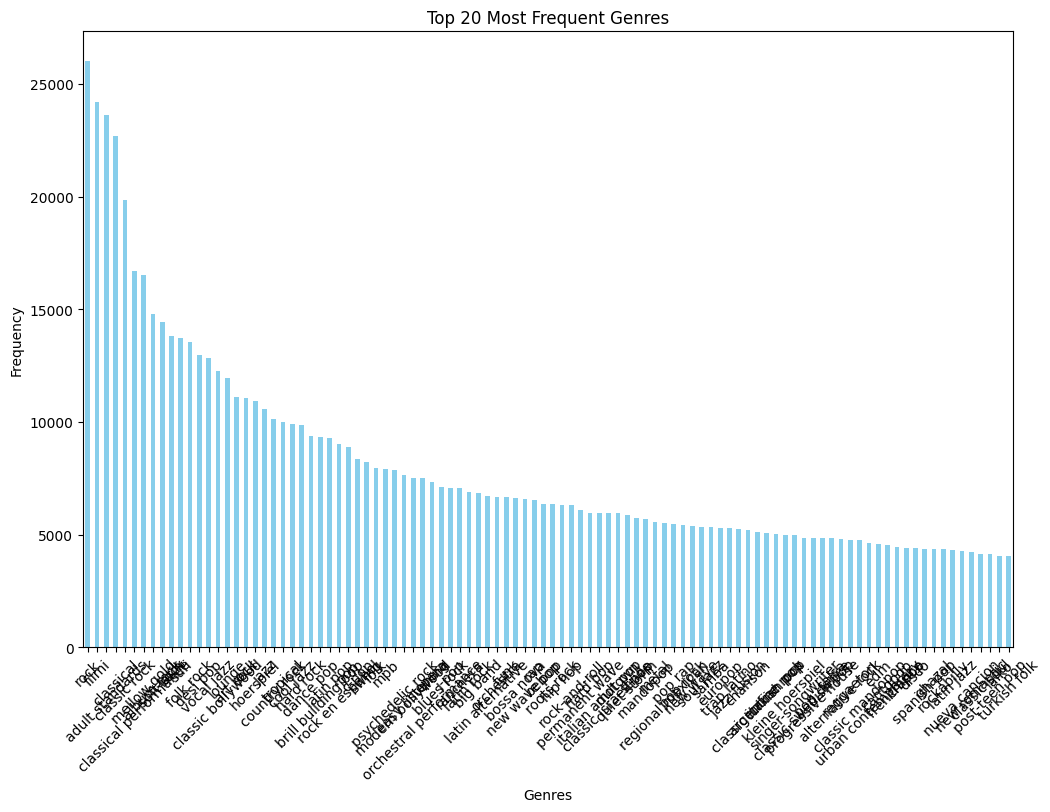

In [157]:
import matplotlib.pyplot as plt
# Assuming genre_lists is already defined
all_genres = [genre for sublist in genre_lists for genre in sublist]

# Create a DataFrame from the list of all genres
genre_series = pd.Series(all_genres)

# Count the frequency of each genre
genre_counts = genre_series.value_counts()

# Select the top 20 most frequent genres
top_genres = genre_counts.head(100)

# Plot the histogram
plt.figure(figsize=(12, 8))
top_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Genres')
plt.xticks(rotation=45)
plt.show()



In [158]:
less_than_100 = genre_counts[genre_counts < 1000]

num_genres_less_than_100 = less_than_100.count()
num_genres_less_than_100 

4255

In [159]:
# Check types of genres
for sublist in genre_lists:
    for genre in sublist:
        if not isinstance(genre, str):
            print(f"Non-string genre found: {genre} of type {type(genre)}")


In [160]:
import numpy as np
import pandas as pd

# Function to check if a list contains a nan value and return the list if it does
def get_lists_with_nan(genre_lists):
    """
    Get lists that contain at least one nan value.
    Parameters:
    genre_lists (list): A list of lists containing genre tags.
    """
    return [genre_list for genre_list in genre_lists if any(pd.isna(genre) for genre in genre_list)]

# Retrieve lists that contain at least one nan
lists_with_nan = get_lists_with_nan(genre_lists)

# Print a sample of lists with nan entries
if lists_with_nan:  # Check if there are any lists with nan
    print("Sample list containing nan:", lists_with_nan[1])  # Print the first list with nan
    print(f"Total lists containing at least one nan: {len(lists_with_nan)}")
else:
    print("No lists with nan found.")


No lists with nan found.


In [161]:
genre_vector_df

,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,popular_song,either_hit,Decade_Hit_1950s and below,Decade_Hit_1960s,Decade_Hit_1970s,Decade_Hit_1980s,Decade_Hit_1990s,Decade_Hit_2000s,Decade_Hit_2010s,Decade_Hit_2020s
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,0,0,0,0,0,0,0,0,0,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,0,0,0,0,0,0,0,0,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,0,0,0,0,0,0,0,0,0,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,0,0,0,0,0,0,0,0,0,0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,0.765,0.6630,0,-5.223,1,...,1,1,0,0,0,0,0,0,0,1
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,0.535,0.3140,7,-12.823,0,...,1,1,0,0,0,0,0,0,0,1
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,1,1,0,0,0,0,0,0,0,1
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,1,1,0,0,0,0,0,0,0,1


Here, I realized that there was not enough separation in my decades for a good classification, based on the features provided and the distribution of songs in the dataset. Thus, I changed my classification to Pre-2000s Hits, Post-2000s Hits and Non-Hits

In [162]:
# Add decade classification to the genre_vector_df
def get_decade(row):
    for decade in ['1950s and below', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']:
        if row[f'Decade_Hit_{decade}'] == 1:
            return decade
    return 'No Hit'
genre_vector_df['decade_hit'] = genre_vector_df.apply(get_decade, axis=1)


In [163]:
# drop all the unnecessary columns
genre_vector_df = genre_vector_df.drop([f'Decade_Hit_{decade}' for decade in ['1950s and below', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']], axis=1)


In [164]:
genre_vector_df

,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,followers,genres,artist_popularity,song_title_normalized,billboard_popular,release_year,decade,popular_song,either_hit,decade_hit
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,3528.0,"[tango, vintage tango]",23.0,vivo para quererte - remasterizado,0,1922,1950s and below,0,0,No Hit
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,3528.0,"[tango, vintage tango]",23.0,el prisionero - remasterizado,0,1922,1950s and below,0,0,No Hit
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,11327.0,"[adult standards, big band, easy listening, lo...",35.0,lady of the evening,0,1922,1950s and below,0,0,No Hit
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,11327.0,"[adult standards, big band, easy listening, lo...",35.0,ave maria,0,1922,1950s and below,0,0,No Hit
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,5078.0,[vintage chanson],22.0,la java,0,1922,1950s and below,0,0,No Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,0.765,0.6630,0,-5.223,1,...,245944.0,"[alt z, alternative r&b, bedroom pop, indie ca...",67.0,blind,1,2020,2020s,1,1,2020s
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,0.535,0.3140,7,-12.823,0,...,1168213.0,"[alt z, electropop, indie pop, la indie, pop, ...",77.0,what they'll say about us,0,2020,2020s,1,1,2020s
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,45309.0,"[chill r&b, indie cafe pop, singaporean pop]",58.0,a day at a time,0,2021,2020s,1,1,2020s
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,93797.0,"[opm, pinoy indie, pinoy singer-songwriter]",53.0,a day at a time,0,2021,2020s,1,1,2020s


In [166]:
genre_vector_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570548 entries, 2 to 683437
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   song_id                570548 non-null  object 
 1   song_name              570548 non-null  object 
 2   song_popularity        570548 non-null  int64  
 3   duration_ms            570548 non-null  int64  
 4   explicit               570548 non-null  int64  
 5   danceability           570548 non-null  float64
 6   energy                 570548 non-null  float64
 7   key                    570548 non-null  int64  
 8   loudness               570548 non-null  float64
 9   mode                   570548 non-null  int64  
 10  speechiness            570548 non-null  float64
 11  acousticness           570548 non-null  float64
 12  instrumentalness       570548 non-null  float64
 13  liveness               570548 non-null  float64
 14  valence                570548 non-null  f

In [167]:
# Change classification to three categories
def classify_song(row):
    if row['decade_hit'] == 'No Hit':
        return 'Non-hits'
    elif row['decade_hit'] in ['1950s and below', '1960s', '1970s', '1980s', '1990s']:
        return 'Pre-2000 hits'
    else:
        return 'Post-2000 hits'

# Apply the classification function
genre_vector_df['hit_category'] = genre_vector_df.apply(classify_song, axis=1)


In [168]:
# encode the cateogrical vairables

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

genre_vector_df['decade_encoded'] = encoder.fit_transform(genre_vector_df['decade'])
genre_vector_df['hit_category_encoded'] = encoder.fit_transform(genre_vector_df['hit_category'])

In [170]:
genre_vector_df.head(40000)

,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,song_title_normalized,billboard_popular,release_year,decade,popular_song,either_hit,decade_hit,hit_category,decade_encoded,hit_category_encoded
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,vivo para quererte - remasterizado,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,el prisionero - remasterizado,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,lady of the evening,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,ave maria,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,la java,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55417,6WUYwjET4BBUeRfU0kbmWR,I Choose You - The Mack/Soundtrack Version,46,221867,0,0.384,0.5720,11,-10.228,0,...,i choose you - the mack/soundtrack version,0,1973,1970s,0,0,No Hit,Non-hits,2,0
55418,4E6swbqHWEAwfPzXdoN5ct,Stop That Train - Jamaican Version,46,233733,0,0.634,0.5910,7,-5.562,1,...,stop that train - jamaican version,0,1973,1970s,0,0,No Hit,Non-hits,2,0
55419,76Mb6t3VBUjEBwKaW9VpbR,Jesus Is Waiting,46,337987,0,0.722,0.1890,4,-15.957,1,...,jesus is waiting,0,1973,1970s,0,0,No Hit,Non-hits,2,0
55420,4ssCwrG2WRHV7QxLH91Xk8,"4th of July, Asbury Park (Sandy)",46,334547,0,0.487,0.5730,0,-10.242,1,...,"4th of july, asbury park (sandy)",0,1973,1970s,0,0,No Hit,Non-hits,2,0


In [191]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named `genre_vector_df`
df = genre_vector_df  # Replace this with your actual DataFrame

# Define a placeholder for the string 'null' that won't conflict with actual data
placeholder_for_null_string = '__STRING_NULL__'

# Replace the string 'null' with the placeholder
df_replaced = df.replace('null', placeholder_for_null_string)

# Convert lists to strings before saving
df_converted = df_replaced.applymap(lambda x: str(x) if isinstance(x, list) else x)

# Define the path where you want to save the CSV file
csv_file_path = 'dataset/genre_vector_df.csv'  # Replace with your desired file path

# Write the DataFrame to a CSV file with indices
df_converted.to_csv(csv_file_path, index=True)

print(f"DataFrame saved to {csv_file_path}")


/var/folders/43/2bhbvl696pg_fjcqtzl8cz2m0000gn/T/ipykernel_44312/2561919474.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_converted = df_replaced.applymap(lambda x: str(x) if isinstance(x, list) else x)


DataFrame saved to dataset/genre_vector_df.csv


# Model Training (without genres)

In [195]:
forest_df = genre_vector_df.copy()
forest_df




,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,song_title_normalized,billboard_popular,release_year,decade,popular_song,either_hit,decade_hit,hit_category,decade_encoded,hit_category_encoded
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,vivo para quererte - remasterizado,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,el prisionero - remasterizado,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,lady of the evening,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,ave maria,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,la java,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,0.765,0.6630,0,-5.223,1,...,blind,1,2020,2020s,1,1,2020s,Post-2000 hits,7,1
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,0.535,0.3140,7,-12.823,0,...,what they'll say about us,0,2020,2020s,1,1,2020s,Post-2000 hits,7,1
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,a day at a time,0,2021,2020s,1,1,2020s,Post-2000 hits,7,1
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,a day at a time,0,2021,2020s,1,1,2020s,Post-2000 hits,7,1


In [196]:
# Start training models: 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target. Let's start with either hit 
features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key',
            'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'time_signature', 'decade_encoded', 'followers']
X = forest_df[features]
y = forest_df['hit_category_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [198]:
# Initialize and train the RandomForest model
forest = RandomForestClassifier(n_estimators=100, random_state=42)
# forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
forest.fit(X_train, y_train)

# Predict and evaluate the model
predictions = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8722986591885024

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     93259
           1       0.79      0.58      0.67     14016
           2       0.81      0.05      0.10      6835

    accuracy                           0.87    114110
   macro avg       0.83      0.54      0.56    114110
weighted avg       0.87      0.87      0.84    114110



<module 'matplotlib.pyplot' from '/Users/tarunvallabhaneni/music_pop_predictor/music/lib/python3.12/site-packages/matplotlib/pyplot.py'>

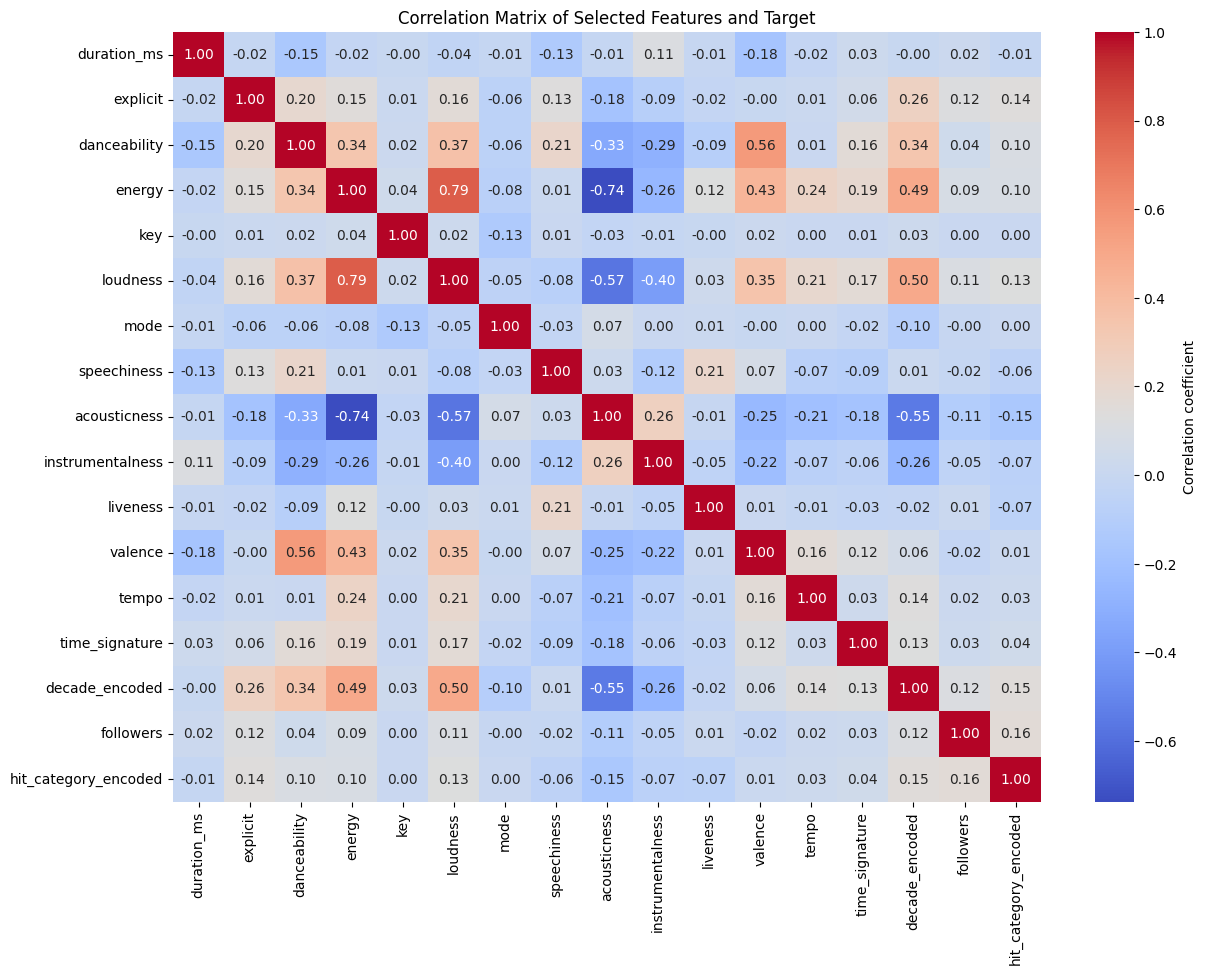

In [216]:
import pandas as pd
import seaborn as sns


# Create a DataFrame with features and target
forest_df['hit_category_encoded'] = y
features_with_target = features + ['hit_category_encoded']
data_for_correlation = forest_df[features_with_target]
# Compute the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Selected Features and Target')
plt




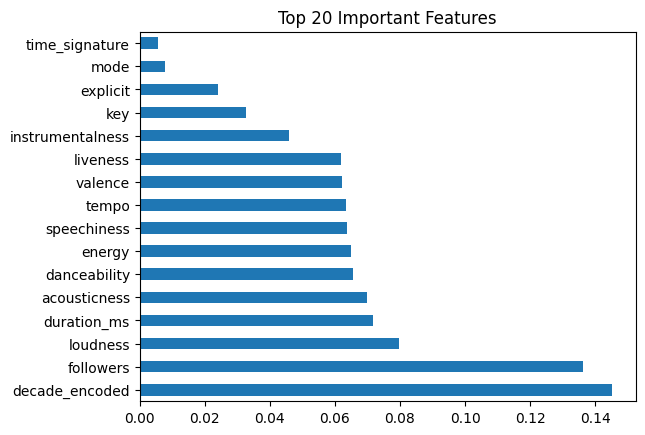

In [218]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(forest.feature_importances_, index=features)
feature_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Important Features')
plt.show()


Due to its inability to classify the Pre 2000s hits properly, I decided to put in genre information using a Sentence Transformer, to use genre as a gauge of popular trends at the time (as audio features seem to not be enough to make this categorization). This held true, as incroporating genres improved model performance significantly, as I will demonstrate. 

In [199]:
transformer_df = genre_vector_df.copy()
transformer_df



,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,song_title_normalized,billboard_popular,release_year,decade,popular_song,either_hit,decade_hit,hit_category,decade_encoded,hit_category_encoded
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,vivo para quererte - remasterizado,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,el prisionero - remasterizado,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,lady of the evening,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,ave maria,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,la java,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,0.765,0.6630,0,-5.223,1,...,blind,1,2020,2020s,1,1,2020s,Post-2000 hits,7,1
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,0.535,0.3140,7,-12.823,0,...,what they'll say about us,0,2020,2020s,1,1,2020s,Post-2000 hits,7,1
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,a day at a time,0,2021,2020s,1,1,2020s,Post-2000 hits,7,1
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,a day at a time,0,2021,2020s,1,1,2020s,Post-2000 hits,7,1


In [200]:
from sentence_transformers import SentenceTransformer
import time

model = SentenceTransformer('all-mpnet-base-v2')

def generate_embedding(genre_list):
    # Start the timer
    
    # Join the list of genres into a single string, separated by a space
    genre_string = " ".join(genre_list)
    
    # Generate the embedding for the concatenated string
    embedding = model.encode(genre_string, normalize_embeddings=True)
    
    return embedding

# Apply the function to each genre list
transformer_df['genre_embeddings'] = transformer_df['genres'].apply(generate_embedding)

# Check the first few entries to ensure embeddings are stored correctly
print(transformer_df.head())





/Users/tarunvallabhaneni/music_pop_predictor/music/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/tarunvallabhaneni/music_pop_predictor/music/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


                  song_id                           song_name  \
2  07A5yehtSnoedViJAZkNnc  Vivo para Quererte - Remasterizado   
3  08FmqUhxtyLTn6pAh6bk45       El Prisionero - Remasterizado   
4  08y9GfoqCWfOGsKdwojr5e                 Lady of the Evening   
5  0BRXJHRNGQ3W4v9frnSfhu                           Ave Maria   
7  0IA0Hju8CAgYfV1hwhidBH                             La Java   

   song_popularity  duration_ms  explicit  danceability  energy  key  \
2                0       181640         0         0.434  0.1770    1   
3                0       176907         0         0.321  0.0946    7   
4                0       163080         0         0.402  0.1580    3   
5                0       178933         0         0.227  0.2610    5   
7                0       161427         0         0.563  0.1840    4   

   loudness  mode  ...  billboard_popular  release_year           decade  \
2   -21.180     1  ...                  0          1922  1950s and below   
3   -27.961     1  ...  

In [201]:
transformer_df

,song_id,song_name,song_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,billboard_popular,release_year,decade,popular_song,either_hit,decade_hit,hit_category,decade_encoded,hit_category_encoded,genre_embeddings
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,...,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0,"[0.015279275, 0.055798184, -0.005695416, 0.003..."
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,...,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0,"[0.015279275, 0.055798184, -0.005695416, 0.003..."
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,...,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0,"[-0.027957805, -0.050583642, 0.017287334, -0.0..."
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,0.227,0.2610,5,-12.343,1,...,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0,"[-0.027957805, -0.050583642, 0.017287334, -0.0..."
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,0.563,0.1840,4,-13.757,1,...,0,1922,1950s and below,0,0,No Hit,Non-hits,0,0,"[0.029315745, 0.11360904, 0.03544703, 0.009433..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683433,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,0.765,0.6630,0,-5.223,1,...,1,2020,2020s,1,1,2020s,Post-2000 hits,7,1,"[-0.022389757, -0.011246383, -0.014854832, -0...."
683434,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,0.535,0.3140,7,-12.823,0,...,0,2020,2020s,1,1,2020s,Post-2000 hits,7,1,"[0.017761212, -0.05186881, -0.009963953, -0.01..."
683435,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,0,2021,2020s,1,1,2020s,Post-2000 hits,7,1,"[0.013945598, -0.031838026, -0.018344702, -0.0..."
683436,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,...,0,2021,2020s,1,1,2020s,Post-2000 hits,7,1,"[0.024781778, -0.00866669, -0.008100987, -0.00..."


In [203]:
# Print the size of the embedding array for the first row
print(transformer_df['genre_embeddings'])


2         [0.015279275, 0.055798184, -0.005695416, 0.003...
3         [0.015279275, 0.055798184, -0.005695416, 0.003...
4         [-0.027957805, -0.050583642, 0.017287334, -0.0...
5         [-0.027957805, -0.050583642, 0.017287334, -0.0...
7         [0.029315745, 0.11360904, 0.03544703, 0.009433...
                                ...                        
683433    [-0.022389757, -0.011246383, -0.014854832, -0....
683434    [0.017761212, -0.05186881, -0.009963953, -0.01...
683435    [0.013945598, -0.031838026, -0.018344702, -0.0...
683436    [0.024781778, -0.00866669, -0.008100987, -0.00...
683437    [0.031767815, 0.011020135, -0.027856281, -0.04...
Name: genre_embeddings, Length: 570548, dtype: object


In [207]:
transformer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570548 entries, 2 to 683437
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   song_id                570548 non-null  object 
 1   song_name              570548 non-null  object 
 2   song_popularity        570548 non-null  int64  
 3   duration_ms            570548 non-null  int64  
 4   explicit               570548 non-null  int64  
 5   danceability           570548 non-null  float64
 6   energy                 570548 non-null  float64
 7   key                    570548 non-null  int64  
 8   loudness               570548 non-null  float64
 9   mode                   570548 non-null  int64  
 10  speechiness            570548 non-null  float64
 11  acousticness           570548 non-null  float64
 12  instrumentalness       570548 non-null  float64
 13  liveness               570548 non-null  float64
 14  valence                570548 non-null  f

In [212]:
import pandas as pd

# Assuming transformer_df is your DataFrame
df = transformer_df.copy()

# Remove the 'genres' column
df.drop(columns=['genres'], inplace=True)

# Define the path where you want to save the pickle file
pickle_file_path = 'dataset/transformer_df.pkl'

# Save the DataFrame to a pickle file
df.to_pickle(pickle_file_path)

print(f"DataFrame saved to {pickle_file_path}")


DataFrame saved to dataset/transformer_df.pkl


In [ ]:
model_df = transformer_df.copy()

In [3]:
import pandas as pd

# Define the path to the pickle file
pickle_file_path = 'dataset/transformer_df.pkl'

# Load the DataFrame from the pickle file
model_df = pd.read_pickle(pickle_file_path)

# Display the loaded DataFrame
print(model_df.head())


                  song_id                           song_name  \
2  07A5yehtSnoedViJAZkNnc  Vivo para Quererte - Remasterizado   
3  08FmqUhxtyLTn6pAh6bk45       El Prisionero - Remasterizado   
4  08y9GfoqCWfOGsKdwojr5e                 Lady of the Evening   
5  0BRXJHRNGQ3W4v9frnSfhu                           Ave Maria   
7  0IA0Hju8CAgYfV1hwhidBH                             La Java   

   song_popularity  duration_ms  explicit  danceability  energy  key  \
2                0       181640         0         0.434  0.1770    1   
3                0       176907         0         0.321  0.0946    7   
4                0       163080         0         0.402  0.1580    3   
5                0       178933         0         0.227  0.2610    5   
7                0       161427         0         0.563  0.1840    4   

   loudness  mode  ...  billboard_popular  release_year           decade  \
2   -21.180     1  ...                  0          1922  1950s and below   
3   -27.961     1  ...  

In [4]:

model_df.info()
test = model_df['hit_category_encoded']

<class 'pandas.core.frame.DataFrame'>
Index: 570548 entries, 2 to 683437
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   song_id                570548 non-null  object 
 1   song_name              570548 non-null  object 
 2   song_popularity        570548 non-null  int64  
 3   duration_ms            570548 non-null  int64  
 4   explicit               570548 non-null  int64  
 5   danceability           570548 non-null  float64
 6   energy                 570548 non-null  float64
 7   key                    570548 non-null  int64  
 8   loudness               570548 non-null  float64
 9   mode                   570548 non-null  int64  
 10  speechiness            570548 non-null  float64
 11  acousticness           570548 non-null  float64
 12  instrumentalness       570548 non-null  float64
 13  liveness               570548 non-null  float64
 14  valence                570548 non-null  f

In [5]:
test.shape

(570548,)

In [8]:
embeddings_matrix = np.stack(model_df['genre_embeddings'].values)

In [9]:
print(embeddings_matrix.shape)


(570548, 768)


In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

def prepare_data_with_pca(df, embeddings_matrix, n_components=50):
    """
    Prepare the data for training a model with PCA.
    Parameters:
    - df: pd.DataFrame - The DataFrame containing the features and target.
    - embeddings_matrix: np.ndarray - The matrix of embeddings to be used as features.
    - n_components: int - The number of components to reduce the embeddings to.
    """
    # Apply PCA to reduce dimensions
    pca = PCA(n_components=n_components)
    embeddings_reduced = pca.fit_transform(embeddings_matrix)
    
    # Convert reduced embeddings back to a DataFrame and concatenate with the original DataFrame
    embeddings_df = pd.DataFrame(embeddings_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
    df_reset = df.reset_index(drop=True).drop(columns=['genre_embeddings'])
    embeddings_df_reset = embeddings_df.reset_index(drop=True)
    
    df_pca = pd.concat([df_reset, embeddings_df_reset], axis=1)
    
    # Select features
    pca_features = [f'PC{i+1}' for i in range(n_components)]
    original_features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 
                         'decade_encoded', 'followers']
    features = original_features + pca_features
    X = df_pca[features]
    y = df_pca['hit_category_encoded']
    
    # Split the data: 80% train+validation, 20% test
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Split train+validation: 80% train, 20% validation
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, pca, df_pca

# Prepare the data
X_train_pca, X_val_pca, X_test_pca, y_train_pca, y_val_pca, y_test_pca, pca, df_pca = prepare_data_with_pca(model_df, embeddings_matrix)

# Optionally, display the new DataFrame structure and PCA explained variance
print(df_pca.head())
print("Explained Variance Ratio:", pca.explained_variance_ratio_.cumsum())

                  song_id                           song_name  \
0  07A5yehtSnoedViJAZkNnc  Vivo para Quererte - Remasterizado   
1  08FmqUhxtyLTn6pAh6bk45       El Prisionero - Remasterizado   
2  08y9GfoqCWfOGsKdwojr5e                 Lady of the Evening   
3  0BRXJHRNGQ3W4v9frnSfhu                           Ave Maria   
4  0IA0Hju8CAgYfV1hwhidBH                             La Java   

   song_popularity  duration_ms  explicit  danceability  energy  key  \
0                0       181640         0         0.434  0.1770    1   
1                0       176907         0         0.321  0.0946    7   
2                0       163080         0         0.402  0.1580    3   
3                0       178933         0         0.227  0.2610    5   
4                0       161427         0         0.563  0.1840    4   

   loudness  mode  ...      PC41      PC42      PC43      PC44      PC45  \
0   -21.180     1  ...  0.035427 -0.007529 -0.031877  0.079128 -0.059841   
1   -27.961     1  ... -

In [12]:
def prepare_data_without_pca(df):
    # Select features
    original_features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 
                         'decade_encoded', 'followers', 'genre_embeddings']
    X = df[original_features]
    y = df['hit_category_encoded']
    
    # Split the data: 80% train+validation, 20% test
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Split train+validation: 80% train, 20% validation
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


In [13]:
# Example usage
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data_without_pca(model_df)

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize RandomForest
forest_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on PCA data
forest_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the validation set
y_pred_val_pca = forest_pca.predict(X_val_pca)

# Evaluate the model
accuracy_val_pca = accuracy_score(y_val_pca, y_pred_val_pca)
report_val_pca = classification_report(y_val_pca, y_pred_val_pca)

print(f"Validation Accuracy with PCA: {accuracy_val_pca}")
print(f"Classification Report (Validation with PCA):\n{report_val_pca}")

# Make predictions on the test set
y_pred_test_pca = forest_pca.predict(X_test_pca)

# Evaluate the model
accuracy_test_pca = accuracy_score(y_test_pca, y_pred_test_pca)
report_test_pca = classification_report(y_test_pca, y_pred_test_pca)

print(f"Test Accuracy with PCA: {accuracy_test_pca}")
print(f"Classification Report (Test with PCA):\n{report_test_pca}")


Validation Accuracy with PCA: 0.879064060993778
Classification Report (Validation with PCA):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     74476
           1       0.80      0.67      0.73     11333
           2       0.53      0.18      0.27      5479

    accuracy                           0.88     91288
   macro avg       0.74      0.60      0.64     91288
weighted avg       0.86      0.88      0.86     91288

Test Accuracy with PCA: 0.8794233634212602
Classification Report (Test with PCA):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     93259
           1       0.80      0.68      0.73     14016
           2       0.51      0.18      0.27      6835

    accuracy                           0.88    114110
   macro avg       0.74      0.61      0.64    114110
weighted avg       0.86      0.88      0.87    114110



In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Apply SMOTE to the PCA training data
smote = SMOTE(random_state=42)
X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca, y_train_pca)




In [28]:
# Initialize RandomForest
forest_pca_smote = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on SMOTE PCA data
forest_pca_smote.fit(X_train_pca_smote, y_train_pca_smote)

# Make predictions on the validation set
y_pred_val_pca_smote = forest_pca_smote.predict(X_val_pca)

# Evaluate the model
accuracy_val_pca_smote = accuracy_score(y_val_pca, y_pred_val_pca_smote)
report_val_pca_smote = classification_report(y_val_pca, y_pred_val_pca_smote)

print(f"Validation Accuracy with PCA and SMOTE: {accuracy_val_pca_smote}")
print(f"Classification Report (Validation with PCA and SMOTE):\n{report_val_pca_smote}")

Validation Accuracy with PCA and SMOTE: 0.8590285689247218
Classification Report (Validation with PCA and SMOTE):
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     74476
           1       0.70      0.76      0.73     11333
           2       0.41      0.43      0.42      5479

    accuracy                           0.86     91288
   macro avg       0.68      0.70      0.69     91288
weighted avg       0.86      0.86      0.86     91288



In [29]:
# Make predictions on the test set
y_pred_test_pca_smote = forest_pca_smote.predict(X_test_pca)

# Evaluate the model
accuracy_test_pca_smote = accuracy_score(y_test_pca, y_pred_test_pca_smote)
report_test_pca_smote = classification_report(y_test_pca, y_pred_test_pca_smote)

print(f"Test Accuracy with PCA and SMOTE: {accuracy_test_pca_smote}")
print(f"Classification Report (Test with PCA and SMOTE):\n{report_test_pca_smote}")

Test Accuracy with PCA and SMOTE: 0.8583384453597406
Classification Report (Test with PCA and SMOTE):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     93259
           1       0.70      0.77      0.73     14016
           2       0.40      0.42      0.41      6835

    accuracy                           0.86    114110
   macro avg       0.67      0.70      0.68    114110
weighted avg       0.86      0.86      0.86    114110



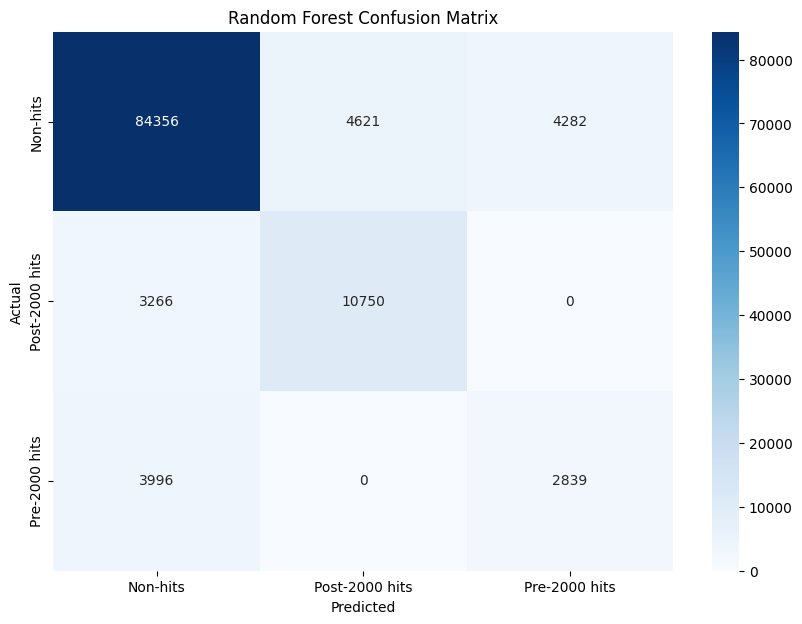

In [30]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-hits', 'Post-2000 hits', 'Pre-2000 hits'], yticklabels=['Non-hits', 'Post-2000 hits', 'Pre-2000 hits'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot the confusion matrix for validation set
plot_confusion_matrix(y_test_pca, y_pred_test_pca_smote, title='Random Forest Confusion Matrix')

## XGBoost

### SMOTE Data

In [21]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Apply SMOTE to the PCA training data
smote = SMOTE(random_state=42)
X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca, y_train_pca)

# Initialize XGBoost
clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric="mlogloss", use_label_encoder=False, 
                        n_estimators=500, learning_rate=0.3, random_state=42)

# Train the model on SMOTE PCA data
clf.fit(X_train_pca_smote, y_train_pca_smote)

# Make predictions on the validation set
y_pred_val_pca_smote = clf.predict(X_val_pca)

# Evaluate the model on the validation set
accuracy_val_pca_smote = accuracy_score(y_val_pca, y_pred_val_pca_smote)
report_val_pca_smote = classification_report(y_val_pca, y_pred_val_pca_smote)

print(f"Validation Accuracy with PCA and SMOTE: {accuracy_val_pca_smote}")
print(f"Classification Report (Validation with PCA and SMOTE):\n{report_val_pca_smote}")

# Make predictions on the test set
y_pred_test_pca_smote = clf.predict(X_test_pca)

# Evaluate the model on the test set
accuracy_test_pca_smote = accuracy_score(y_test_pca, y_pred_test_pca_smote)
report_test_pca_smote = classification_report(y_test_pca, y_pred_test_pca_smote)

print(f"Test Accuracy with PCA and SMOTE: {accuracy_test_pca_smote}")
print(f"Classification Report (Test with PCA and SMOTE):\n{report_test_pca_smote}")


Validation Accuracy with PCA and SMOTE: 0.8510757164139865
Classification Report (Validation with PCA and SMOTE):
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     74476
           1       0.70      0.77      0.73     11333
           2       0.37      0.47      0.42      5479

    accuracy                           0.85     91288
   macro avg       0.67      0.71      0.69     91288
weighted avg       0.86      0.85      0.86     91288

Test Accuracy with PCA and SMOTE: 0.8510735255455263
Classification Report (Test with PCA and SMOTE):
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     93259
           1       0.70      0.77      0.73     14016
           2       0.37      0.47      0.41      6835

    accuracy                           0.85    114110
   macro avg       0.66      0.71      0.68    114110
weighted avg       0.86      0.85      0.86    114110



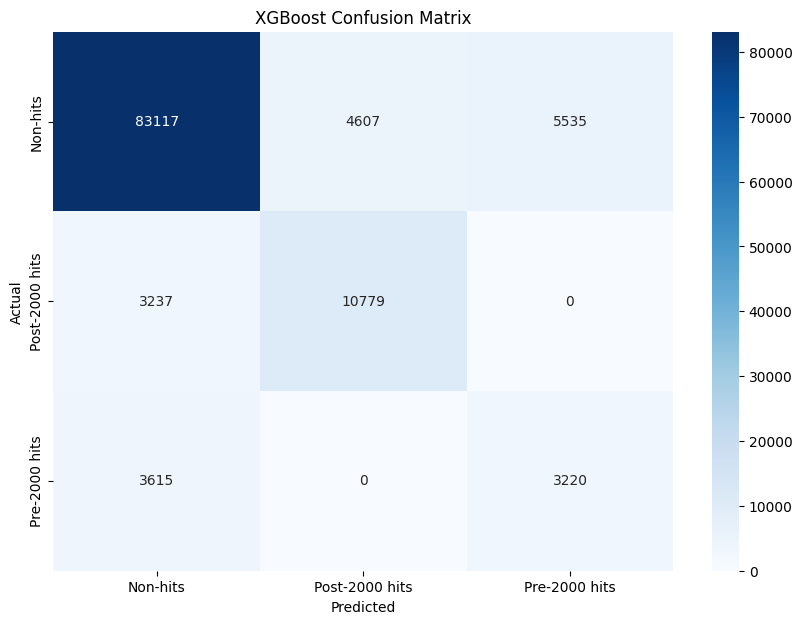

In [26]:
plot_confusion_matrix(y_test_pca, y_pred_test_pca_smote, title='XGBoost Confusion Matrix')

### Non SMOTE Data

In [244]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost
clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric="mlogloss", use_label_encoder=False, 
                        n_estimators=500, learning_rate=0.3, random_state=42)

# Train the model on PCA data
clf.fit(X_train_pca, y_train_pca)

# Make predictions on the validation set
y_pred_val_pca = clf.predict(X_val_pca)

# Evaluate the model on the validation set
accuracy_val_pca = accuracy_score(y_val_pca, y_pred_val_pca)
report_val_pca = classification_report(y_val_pca, y_pred_val_pca)

print(f"Validation Accuracy with PCA: {accuracy_val_pca}")
print(f"Classification Report (Validation with PCA):\n{report_val_pca}")

# Make predictions on the test set
y_pred_test_pca = clf.predict(X_test_pca)

# Evaluate the model on the test set
accuracy_test_pca = accuracy_score(y_test_pca, y_pred_test_pca)
report_test_pca = classification_report(y_test_pca, y_pred_test_pca)

print(f"Test Accuracy with PCA: {accuracy_test_pca}")
print(f"Classification Report (Test with PCA):\n{report_test_pca}")


Validation Accuracy with PCA: 0.8799842257470861
Classification Report (Validation with PCA):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     74476
           1       0.79      0.69      0.74     11333
           2       0.52      0.20      0.29      5479

    accuracy                           0.88     91288
   macro avg       0.74      0.62      0.65     91288
weighted avg       0.86      0.88      0.87     91288

Test Accuracy with PCA: 0.8812023486109894
Classification Report (Test with PCA):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     93259
           1       0.79      0.70      0.74     14016
           2       0.51      0.20      0.29      6835

    accuracy                           0.88    114110
   macro avg       0.73      0.62      0.65    114110
weighted avg       0.87      0.88      0.87    114110



## ADD THE GRID SEARCH FOR HYPERTUNING

## KNN

### NON SMOTE

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the scaler
scaler = StandardScaler()

# Scale the PCA data
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_val_pca_scaled = scaler.transform(X_val_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on scaled PCA data
knn.fit(X_train_pca_scaled, y_train_pca)

# Make predictions on the validation set
y_pred_val_pca_knn = knn.predict(X_val_pca_scaled)

# Evaluate the model on the validation set
accuracy_val_pca_knn = accuracy_score(y_val_pca, y_pred_val_pca_knn)
report_val_pca_knn = classification_report(y_val_pca, y_pred_val_pca_knn)

print(f"Validation Accuracy with Scaled PCA (KNN): {accuracy_val_pca_knn}")
print(f"Classification Report (Validation with Scaled PCA - KNN):\n{report_val_pca_knn}")

# Make predictions on the test set
y_pred_test_pca_knn = knn.predict(X_test_pca_scaled)

# Evaluate the model on the test set
accuracy_test_pca_knn = accuracy_score(y_test_pca, y_pred_test_pca_knn)
report_test_pca_knn = classification_report(y_test_pca, y_pred_test_pca_knn)

print(f"Test Accuracy with Scaled PCA (KNN): {accuracy_test_pca_knn}")
print(f"Classification Report (Test with Scaled PCA - KNN):\n{report_test_pca_knn}")


Validation Accuracy with Scaled PCA (KNN): 0.8574292349487337
Classification Report (Validation with Scaled PCA - KNN):
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     74476
           1       0.72      0.60      0.65     11333
           2       0.40      0.20      0.27      5479

    accuracy                           0.86     91288
   macro avg       0.67      0.58      0.61     91288
weighted avg       0.84      0.86      0.85     91288

Test Accuracy with Scaled PCA (KNN): 0.8579528525107353
Classification Report (Test with Scaled PCA - KNN):
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     93259
           1       0.71      0.60      0.65     14016
           2       0.40      0.20      0.27      6835

    accuracy                           0.86    114110
   macro avg       0.67      0.58      0.61    114110
weighted avg       0.84      0.86      0.85    114110



### SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the scaler
scaler = StandardScaler()

# Scale the PCA data
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_val_pca_scaled = scaler.transform(X_val_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

# Apply SMOTE to the scaled PCA training data
smote = SMOTE(random_state=42)
X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca_scaled, y_train_pca)

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on SMOTE scaled PCA data
knn.fit(X_train_pca_smote, y_train_pca_smote)

# Make predictions on the validation set
y_pred_val_pca_knn_smote = knn.predict(X_val_pca_scaled)

# Evaluate the model on the validation set
accuracy_val_pca_knn_smote = accuracy_score(y_val_pca, y_pred_val_pca_knn_smote)
report_val_pca_knn_smote = classification_report(y_val_pca, y_pred_val_pca_knn_smote)

print(f"Validation Accuracy with Scaled PCA and SMOTE (KNN): {accuracy_val_pca_knn_smote}")
print(f"Classification Report (Validation with Scaled PCA and SMOTE - KNN):\n{report_val_pca_knn_smote}")

# Make predictions on the test set
y_pred_test_pca_knn_smote = knn.predict(X_test_pca_scaled)

# Evaluate the model on the test set
accuracy_test_pca_knn_smote = accuracy_score(y_test_pca, y_pred_test_pca_knn_smote)
report_test_pca_knn_smote = classification_report(y_test_pca, y_pred_test_pca_knn_smote)

print(f"Test Accuracy with Scaled PCA and SMOTE (KNN): {accuracy_test_pca_knn_smote}")
print(f"Classification Report (Test with Scaled PCA and SMOTE - KNN):\n{report_test_pca_knn_smote}")


Validation Accuracy with Scaled PCA and SMOTE (KNN): 0.7656428008062396
Classification Report (Validation with Scaled PCA and SMOTE - KNN):
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     74476
           1       0.53      0.77      0.63     11333
           2       0.25      0.57      0.34      5479

    accuracy                           0.77     91288
   macro avg       0.57      0.71      0.61     91288
weighted avg       0.84      0.77      0.79     91288

Test Accuracy with Scaled PCA and SMOTE (KNN): 0.7657260538077294
Classification Report (Test with Scaled PCA and SMOTE - KNN):
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     93259
           1       0.53      0.78      0.63     14016
           2       0.25      0.57      0.34      6835

    accuracy                           0.77    114110
   macro avg       0.57      0.71      0.61    114110
weighted avg       0.84  

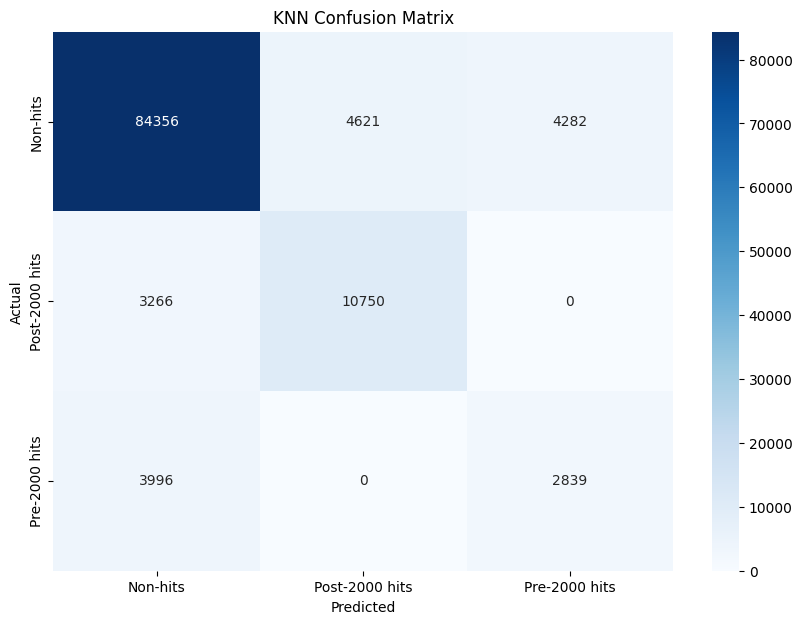

In [34]:
plot_confusion_matrix(y_test_pca, y_pred_test_pca_smote, title='KNN Confusion Matrix')

## Hypertune

In [249]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the scaler
scaler = StandardScaler()

# Scale the PCA data
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_val_pca_scaled = scaler.transform(X_val_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

# Apply SMOTE to the scaled PCA training data
smote = SMOTE(random_state=42)
X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca_scaled, y_train_pca)

# Function to train and evaluate KNN
def evaluate_knn(n_neighbors):
    # Initialize KNN with the given number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model on SMOTE scaled PCA data
    knn.fit(X_train_pca_smote, y_train_pca_smote)

    # Make predictions on the validation set
    y_pred_val_pca_knn_smote = knn.predict(X_val_pca_scaled)

    # Evaluate the model on the validation set
    accuracy_val_pca_knn_smote = accuracy_score(y_val_pca, y_pred_val_pca_knn_smote)
    report_val_pca_knn_smote = classification_report(y_val_pca, y_pred_val_pca_knn_smote)

    print(f"Validation Accuracy with Scaled PCA and SMOTE (KNN) - {n_neighbors} neighbors: {accuracy_val_pca_knn_smote}")
    print(f"Classification Report (Validation with Scaled PCA and SMOTE - KNN) - {n_neighbors} neighbors:\n{report_val_pca_knn_smote}")

    # Make predictions on the test set
    y_pred_test_pca_knn_smote = knn.predict(X_test_pca_scaled)

    # Evaluate the model on the test set
    accuracy_test_pca_knn_smote = accuracy_score(y_test_pca, y_pred_test_pca_knn_smote)
    report_test_pca_knn_smote = classification_report(y_test_pca, y_pred_test_pca_knn_smote)

    print(f"Test Accuracy with Scaled PCA and SMOTE (KNN) - {n_neighbors} neighbors: {accuracy_test_pca_knn_smote}")
    print(f"Classification Report (Test with Scaled PCA and SMOTE - KNN) - {n_neighbors} neighbors:\n{report_test_pca_knn_smote}")

# Evaluate KNN with different numbers of neighbors
for n_neighbors in [3, 5, 7, 9]:
    evaluate_knn(n_neighbors)


Validation Accuracy with Scaled PCA and SMOTE (KNN) - 3 neighbors: 0.7652922618525984
Classification Report (Validation with Scaled PCA and SMOTE - KNN) - 3 neighbors:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     74476
           1       0.53      0.77      0.63     11333
           2       0.25      0.57      0.34      5479

    accuracy                           0.77     91288
   macro avg       0.57      0.71      0.61     91288
weighted avg       0.84      0.77      0.79     91288

Test Accuracy with Scaled PCA and SMOTE (KNN) - 3 neighbors: 0.7658224520199807
Classification Report (Test with Scaled PCA and SMOTE - KNN) - 3 neighbors:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     93259
           1       0.53      0.78      0.63     14016
           2       0.25      0.57      0.34      6835

    accuracy                           0.77    114110
   macro avg       0.57

In [2]:
import pandas as pd

# Define the path to the pickle file
pickle_file_path = 'dataset/transformer_df.pkl'

# Load the DataFrame from the pickle file
df_loaded = pd.read_pickle(pickle_file_path)

# Display the loaded DataFrame
print(df_loaded.head())


                  song_id                           song_name  \
2  07A5yehtSnoedViJAZkNnc  Vivo para Quererte - Remasterizado   
3  08FmqUhxtyLTn6pAh6bk45       El Prisionero - Remasterizado   
4  08y9GfoqCWfOGsKdwojr5e                 Lady of the Evening   
5  0BRXJHRNGQ3W4v9frnSfhu                           Ave Maria   
7  0IA0Hju8CAgYfV1hwhidBH                             La Java   

   song_popularity  duration_ms  explicit  danceability  energy  key  \
2                0       181640         0         0.434  0.1770    1   
3                0       176907         0         0.321  0.0946    7   
4                0       163080         0         0.402  0.1580    3   
5                0       178933         0         0.227  0.2610    5   
7                0       161427         0         0.563  0.1840    4   

   loudness  mode  ...  billboard_popular  release_year           decade  \
2   -21.180     1  ...                  0          1922  1950s and below   
3   -27.961     1  ...  